In [3]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import files
uploaded = files.upload()

Saving kakei_research.pdf to kakei_research.pdf


# 総務省のURLから本文を抽出して要約する

In [0]:
#家計調査のURLを入力
#r = requests.get('http://warp.da.ndl.go.jp/info:ndljp/pid/11374244/www.stat.go.jp/data/kakei/sokuhou/tsuki/index.html')

In [0]:
r = requests.get('https://www.stat.go.jp/data/kakei/sokuhou/tsuki/index.html')

In [6]:
print(r.headers)
print("--------")
print(r.encoding)
print(r.content)

{'Date': 'Wed, 18 Dec 2019 05:45:35 GMT', 'Last-Modified': 'Thu, 05 Dec 2019 23:31:04 GMT', 'Accept-Ranges': 'bytes', 'Content-Length': '38981', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html', 'Set-Cookie': 'BIGipServerA002005H_pool_slbI-03_01_ID=168256010.20480.0000; path=/, TS012b3adb=01bdfdcb5329449c933ff581a2c5c50a58e41e8ec338b32a470a248b68a508d9e40ec6e115a9f9190666b93adbef46faa00ffd411d; Path=/'}
--------
ISO-8859-1
b'<!DOCTYPE html>\n<html lang="ja">\n <head> \n  <meta charset="Shift_JIS"> \n  <meta http-equiv="x-ua-compatible" content="IE=Edge"> \n  <meta name="viewport" content="width=device-width, initial-scale=1"> \n  <meta name="format-detection" content="telephone=no"> \n  <meta name="author" content="\x91\x8d\x96\xb1\x8f\xc8\x93\x9d\x8cv\x8b\xc7"> \n  <meta name="description" content="\x91\x8d\x96\xb1\x8f\xc8\x93\x9d\x8cv\x8b\xc7\x81A\x93\x9d\x8cv\x8c\xa4\

総務省の家計調査の記事の本文を抽出する

In [0]:
soup = BeautifulSoup(r.content, "html.parser")

In [0]:
#a=soup.find_all("p")

In [0]:
#a=soup.find_all(class_="underline")

In [0]:
#for script in soup(["script", "style"]):
#    script.decompose()

In [0]:
text=soup.get_text()

In [0]:
lines= [line.strip() for line in text.splitlines()]

In [0]:
text="\n".join(line for line in lines if line)

In [0]:
lines=[a for a in lines if a != '']

必要事項を抜き出す辞書を定義

In [0]:
dic = {'research':0,'month': 1, 'day': 2, 'expend': 3,'real':3}

月の抽出、何日に発表されたかの抽出

In [0]:
month=re.search('家計調査（二人以上の世帯）.*?月',text).group()[-3:-1]
if month[0]=='）':
  month=month[-1]

In [17]:
dic['month']=month
month

'10'

In [0]:
day=re.search('家計調査（二人以上の世帯）.*?日',text).group()[-3:-1]
if day[0]=='月':
  day=day[-1]

In [0]:
dic['day']=day

ポイントの箇所を抽出してスペースを　除く

In [0]:
tex=re.search('≪ポイント≫.*?注',text,re.S).group()
tex=tex.replace('\xa0','')

１世代あたりの消費支出、前年同月比の実質の取得

In [21]:
tex

'≪ポイント≫\n消費支出\n消費支出（二人以上の世帯）は，1世帯当たり279,671円\n前年同月比実質 4.0%の減少名目 3.7%の減少\n前月比（季節調整値）実質 11.5%の減少\n変動調整値注'

In [0]:
#re.sub('''',tex)

In [23]:
tex.replace('\xa0','')

'≪ポイント≫\n消費支出\n消費支出（二人以上の世帯）は，1世帯当たり279,671円\n前年同月比実質 4.0%の減少名目 3.7%の減少\n前月比（季節調整値）実質 11.5%の減少\n変動調整値注'

In [24]:
'''総務省が6日発表した10月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり27万9671円だった。
物価変動の影響を除いた実質で前年同月に比べて5.1%減った。マイナスは11カ月ぶり。落ち込み幅は5%から8%に消費税率を上げた後の2014年4月（4.6%減）より大きかった。
増税前の駆け込み需要の反動に台風の影響も重なった。'''

'総務省が6日発表した10月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり27万9671円だった。\n物価変動の影響を除いた実質で前年同月に比べて5.1%減った。マイナスは11カ月ぶり。落ち込み幅は5%から8%に消費税率を上げた後の2014年4月（4.6%減）より大きかった。\n増税前の駆け込み需要の反動に台風の影響も重なった。'

In [0]:
expend=re.search('1世帯当たり.*?円',tex).group()

In [0]:
expend=expend.replace('1世帯当たり','')
expend=expend.replace(',','')
#expend=expend.replace('円','')
dic['expend']=expend[:-5]+'万'+expend[-5:]

前年同月比の実質の抽出

In [0]:
real=re.search('前年同月比実質.*?名目',tex).group()

In [0]:
sss=''
if '増' in real:
  sss='増えた'
elif '減' in real:
  sss='減った'

In [0]:
real=re.search('[+-]?[0-9]+(\.[0-9]*)?([eE][+-]?[0-9]+)?',real).group()

In [0]:
dic['real']=real+'%'+sss

In [0]:
dic['research']=re.search('.*報告',text).group().replace('報告','')

In [65]:
dic['']

'家計調査'

In [62]:
print(text)

家計調査報告（二人以上の世帯）－2019年（令和元年）10月分－
消費支出（二人以上の世帯）は， １世帯当たり ２７９，６７１ 円
前年同月比 実質 ４．０％の減少 名目 ３．７％の減少
前年同月比(変動調整値) 実質 ５．１％の減少 名目 ４．８％の減少
前月比(季節調整値) 実質 １１．５％の減少
※ 変動調整値：調査方法の変更の影響による変動を調整した推計値
１ 消費支出の推移
2018年 2019年
10 月 11 月 12 月 1 月 2 月 3 月 4 月 5 月 6 月 7 月 8 月 9 月 10 月
-0.2 -0.5 0.1 2.0 1.7 2.1 1.3 4.0 2.7 0.8 1.0 9.5 -5.1
0.5 -0.7 -0.2 0.5 1.2 2.0 1.7 2.5 2.6 2.4 1.4 3.7 1.6
注１ ３か月後方移動平均は，すう勢的な動向を見るため，当月を含む直近３か月間の金額を平均した値である。
２ 2018年１月以降は変動調整値
2018年 2019年
10 月 11 月 12 月 1 月 2 月 3 月 4 月 5 月 6 月 7 月 8 月 9 月 10 月
98.8 99.0 98.9 101.1 99.1 99.2 97.8 103.2 100.3 99.4 101.8 107.4 95.1
1.5 0.2 -0.1 0.7 -2.0 0.1 -1.4 5.5 -2.8 -0.9 2.4 5.5 -11.5
注１ 季節調整の方法は，センサス局法(X-12-ARIMA)を用いた。季節調整値は，例年１月分公表時に，過去に遡って改定している。
２ 指数は，2018年１月に行った調査で使用する家計簿の改正の影響による変動を含むため，時系列比較の際には注意が必要。
なお，2019年１月の対前月変化率は変動調整値
令 和 元 年 12 月 ６ 日
家 計 調 査 報 告
－2019年(令和元年)10月分－
対前月変化率 ( ％ )
(％) 図１ 消費支出の対前年同月実質増減率の推移（二人以上の世帯）
消 費 支 出
（参考）３か月後方移動平均
図２ 消費支出（季節調整済実質指数）の推移（二人以上の世帯）
消 費 支 出
-12
-8
-4
0
4
8
12
10
2017
11
年
12 １
2018
２
年
３ ４ ５ ６ ７ 

In [0]:
honbun='総務省が'+dic['day']+'日発表した'+dic['month']+'月の'+dic['research']+'によると、2人以上の世帯の消費支出は1世帯あたり'+dic['expend']+'だった。\n物価変動の影響を除いた実質で前年同月に比べて'+dic['real']+'。'

In [33]:
print(honbun)

総務省が6日発表した10月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり27万9671円だった。
物価変動の影響を除いた実質で前年同月に比べて4.0%減った。


In [34]:
'''総務省が6日発表した7月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり28万8026円だった。
物価変動の影響を除いた実質で前年同月に比べて1.0%増えた。'''

'総務省が6日発表した7月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり28万8026円だった。\n物価変動の影響を除いた実質で前年同月に比べて1.0%増えた。'

In [35]:
pip install tika

  Created wheel for tika: filename=tika-1.23-cp36-none-any.whl size=31852 sha256=d38f64b35645a75b6df59d9221386f02d8b8343df75331cdae1fb2fc968a5cfa
  Stored in directory: /root/.cache/pip/wheels/39/01/4c/184b118bbece0003fd5e7aba3e6a52579e590a84eb3d2b96e5
Successfully built tika


総務省が6日発表した7月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり28万8026円だった。
物価変動の影響を除いた実質で前年同月に比べて1.0%増えた。

総務省が6日発表した6月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり27万6882円だった。
物価変動の影響を除いた実質で前年同月に比べて2.7%増えた。

In [36]:
from tika import parser

file_data = parser.from_file('kakei_research.pdf')
text = file_data["content"]
#print(text)

2019-12-18 05:45:43,270 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.23/tika-server-1.23.jar to /tmp/tika-server.jar.
2019-12-18 05:45:51,320 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.23/tika-server-1.23.jar.md5 to /tmp/tika-server.jar.md5.
2019-12-18 05:45:51,935 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2019-12-18 05:45:56,943 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


# 総務省の記事に添付されているpdfファイルから過去の推移や種別の増減を抽出する

In [0]:
text='\n'.join(filter(lambda x: x.strip(), map(lambda x: x.strip(), text.split('\n'))))
ltex=text.split('\n')
s=ltex.index('１ 消費支出の推移')
zougen=[float(n) for n in ltex[s+3].split(' ')]

In [0]:
zdic={0:'減少',1:'増加'}

In [40]:
seq=[]
flag=0
change=''
if zougen[-1]<0:
    flag=0
else:
    flag=1
change=zdic[flag]
count=0
flag_new=0
for i in reversed(zougen):
  if i<0:
    flag_new=0
  elif i>=0:
    flag_new=1
  print(i,flag_new)
  if flag==flag_new:
    count+=1
  else:
    seq.append(count)
    count=1
  flag=flag_new
seq.append(count)
if len(seq)==1:
  change=change+'は'+str(seq[0])+'ヵ月連続。'
elif len(seq)>=2:
  if seq[0] ==1:
    change=str(seq[1])+'ヵ月ぶりの'+change+'。'
  else:
    change=change+'は'+str(seq[1])+'ヵ月連続。'

-5.1 0
9.5 1
1.0 1
0.8 1
2.7 1
4.0 1
1.3 1
2.1 1
1.7 1
2.0 1
0.1 1
-0.5 0
-0.2 0


In [41]:
change

'10ヵ月ぶりの減少。'

In [42]:
seq

[1, 10, 2]

In [43]:
zougen

[-0.2, -0.5, 0.1, 2.0, 1.7, 2.1, 1.3, 4.0, 2.7, 0.8, 1.0, 9.5, -5.1]

In [44]:
str(count+1)+'回連続の'+zdic[flag]

'3回連続の減少'

In [45]:
s=ltex.index('２\u3000消費支出とその内訳')+4
utilist=['食品','住居','光熱・水道','家具・家事用品','被服及び履物','保健医療','交通・通信','教 育','教養娯楽','その他の消費支出']
utiwake=[]
for i in range(10):
    if '(' in ltex[s+i].split(' ')[2]:
        a=ltex[s+i].split(' ')[2][1:-1]
    else:
        a=ltex[s+i].split(' ')[2]
    utiwake.append(float(a))
utiwake

[-3.9, -12.7, -4.6, -16.3, -10.7, -2.8, -6.3, -15.9, -5.1, 3.8]

In [0]:
#honbun=honbun+'\n'+zdic[flag]+'は'+str(count+1)+'回連続。\n'+'消費支出の内訳をみると'+utilist[utiwake.index(max(utiwake))]+'が最も多く増加し'+str(max(utiwake))+'%増加した。'+utilist[utiwake.index(min(utiwake))]+'が最も減少し'+str(min(utiwake))[1:]+'減少した。'

In [0]:
honbun1=honbun+'\n'+change+'\n'+'消費支出の内訳をみると'+utilist[utiwake.index(max(utiwake))]+'が最も多く増加し'+str(max(utiwake))+'%増加した。'+utilist[utiwake.index(min(utiwake))]+'が最も減少し'+str(min(utiwake))[1:]+'減少した。'

In [48]:
print(honbun1)

総務省が6日発表した10月の家計調査によると、2人以上の世帯の消費支出は1世帯あたり27万9671円だった。
物価変動の影響を除いた実質で前年同月に比べて4.0%減った。
10ヵ月ぶりの減少。
消費支出の内訳をみるとその他の消費支出が最も多く増加し3.8%増加した。家具・家事用品が最も減少し16.3減少した。


In [49]:
zougen

[-0.2, -0.5, 0.1, 2.0, 1.7, 2.1, 1.3, 4.0, 2.7, 0.8, 1.0, 9.5, -5.1]

In [50]:
ltex.index( '（円）')

123

In [51]:
ltex[124]

'消 費 支 出 11か月ぶりの実質減少'

In [52]:
ltex

['家計調査報告（二人以上の世帯）－2019年（令和元年）10月分－',
 '消費支出（二人以上の世帯）は， １世帯当たり ２７９，６７１ 円',
 '前年同月比 実質 ４．０％の減少 名目 ３．７％の減少',
 '前年同月比(変動調整値) 実質 ５．１％の減少 名目 ４．８％の減少',
 '前月比(季節調整値) 実質 １１．５％の減少',
 '※ 変動調整値：調査方法の変更の影響による変動を調整した推計値',
 '１ 消費支出の推移',
 '2018年 2019年',
 '10 月 11 月 12 月 1 月 2 月 3 月 4 月 5 月 6 月 7 月 8 月 9 月 10 月',
 '-0.2 -0.5 0.1 2.0 1.7 2.1 1.3 4.0 2.7 0.8 1.0 9.5 -5.1',
 '0.5 -0.7 -0.2 0.5 1.2 2.0 1.7 2.5 2.6 2.4 1.4 3.7 1.6',
 '注１ ３か月後方移動平均は，すう勢的な動向を見るため，当月を含む直近３か月間の金額を平均した値である。',
 '２ 2018年１月以降は変動調整値',
 '2018年 2019年',
 '10 月 11 月 12 月 1 月 2 月 3 月 4 月 5 月 6 月 7 月 8 月 9 月 10 月',
 '98.8 99.0 98.9 101.1 99.1 99.2 97.8 103.2 100.3 99.4 101.8 107.4 95.1',
 '1.5 0.2 -0.1 0.7 -2.0 0.1 -1.4 5.5 -2.8 -0.9 2.4 5.5 -11.5',
 '注１ 季節調整の方法は，センサス局法(X-12-ARIMA)を用いた。季節調整値は，例年１月分公表時に，過去に遡って改定している。',
 '２ 指数は，2018年１月に行った調査で使用する家計簿の改正の影響による変動を含むため，時系列比較の際には注意が必要。',
 'なお，2019年１月の対前月変化率は変動調整値',
 '令 和 元 年 12 月 ６ 日',
 '家 計 調 査 報 告',
 '－2019年(令和元年)10月分－',
 '対前月変化率 ( ％ )',
 '(％) 図１ 消費支出の対前年同月実質増減率の推移（二人以上の世帯）',
 '消 費 支 出',
 '（参考

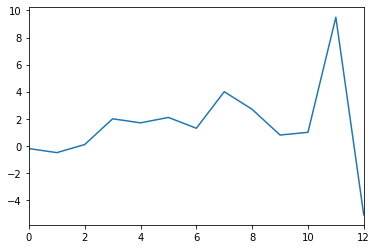

In [53]:
pd.Series(zougen).plot()

In [54]:
pd.date_range(start='10/2018', end='10/2019', freq='2M')

DatetimeIndex(['2018-10-31', '2018-12-31', '2019-02-28', '2019-04-30',
               '2019-06-30', '2019-08-31'],
              dtype='datetime64[ns]', freq='2M')

In [70]:
import MeCab
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

text = open('simuraly-data.txt', 'r').read()
documents = text.replace("\n", "").split("end_of_text")

def words(text):
    # 文章を単語に分割する
    word_list = []
    tagger = MeCab.Tagger('-Ochasen')
    tagger.parse('')
    node = tagger.parseToNode(text)

    file = open('words.txt', 'a')
    while node:
        word_type = node.feature.split(",")[0]
        word = node.surface
        if word == '*' and node.feature.split(",")[6].isalpha():
            word = node.feature.split(",")[6]

        if len(word) > 1 and word.isalpha() and word_type in ["名詞"]:
            word_list.append(word.lower())
            file.write(str(word + "\n"))

        node = node.next

    file.close()
    return word_list

# テキストごとに単語分割して学習データを作成する
train_data = []
file = open('documents.txt', 'w')

for i, document in enumerate(documents):
    train_data.append(TaggedDocument(words=words(document), tags=['text' + str(i + 1)]))
    file.write("*****" + str(words(document)) + "\n")

file.close()


# doc2vec の学習を実行
model = Doc2Vec(documents=train_data, min_count=1, alpha=0.005, epochs=40, sample=20, dm=1)

ModuleNotFoundError: ignored

SyntaxError: ignored